In [1]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import gridspec
from matplotlib import rcParams
from scipy.optimize import curve_fit
import scipy.stats as stats
from matplotlib import lines
import seaborn as sns
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42


import pandas as pd
import glob

#thinter to tbe able to choose a meta data file
#import tkinter as tk
#from tkinter import filedialog#to open dialog box to choose file
#from tkinter.filedialog import askopenfilename

/Users/wormsenselab/anaconda3/envs/dabest/lib/python3.7/site-packages/matplotlib/__init__.py:1003: UserWarning: Duplicate key in file "/Users/Fechner/.matplotlib/matplotlibrc", line #3
  (fname, cnt))
/Users/wormsenselab/anaconda3/envs/dabest/lib/python3.7/site-packages/matplotlib/__init__.py:1003: UserWarning: Duplicate key in file "/Users/Fechner/.matplotlib/matplotlibrc", line #4
  (fname, cnt))


In [2]:
cd ~/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/Selectivity/

/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/Selectivity


In [3]:
#filedir ='C:/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/RatioSTFX/' #windows
filedir ='/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/Selectivity/'
filedirExportFig ='/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/AnalysisNterm/FiguresFromNotebook/'

#root = tk.Tk()
#root.withdraw() not sure if becessary, description to avoid opening full gui

#either choose a cetain file or open dialog box
filename = 'SummaryVrev.xlsx'
#filename = filedialog.askopenfilename()
#root.update() # necessary in Mac(?) to close the dialog box

In [4]:
import pandas as pd
xl = pd.ExcelFile(filedir+filename)
xl.sheet_names

df = xl.parse("SelAlldata") #calls for Sheet names 
df.head()

,Injection,CellID,StartSol,VrStart,Iminus85Start,TestSol,VrTest,Iminus85Test,Vd,Permeability,Ratio
0,mg418mg419mg012,STFX063001,NaGluSel1,0.010510,1.247815e-05,KGluSel,-0.016925,5.534604e-06,-0.027435,0.342437,0.443544
1,mg418mg012,STFX063003,NaGluSel1,0.003413,7.573976e-07,KGluSel,0.001076,7.079405e-07,-0.002337,0.912756,0.934701
2,mg418mg419mg012,STFX063004,NaGluSel1,-0.004414,8.208025e-06,KGluSel,-0.047026,2.034570e-06,-0.042612,0.189280,0.247876
3,mg418mg012,STFX063007,NaGluSel1,0.006440,4.775261e-07,KGluSel,0.006163,5.362270e-07,-0.000277,0.989235,1.122927
4,mg418mg012,STFX063008,NaGluSel1,0.006882,7.171729e-07,KGluSel,0.002580,7.076569e-07,-0.004303,0.845284,0.986731


In [5]:
# calculate P0 for mg418
#colors = ['black']
colors = []
for i in range(50):
    colors.append("red")


#colors = ['black','red','yellow','yellow','red','black','red','red', 'black','black','black', 'yellow','black','black',
      #'red','red','black','red']
#colors = [(0.30, 0.69, 0.29),(0.60, 0.31,0.64),(0.89, 0.11,0.10),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00),"darkgreen",(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.6, 0.31, 0.64)]

In [6]:
ReNameAlanin ={'F84A':'mg738mg012',# 
         'K85A':'mg739mg012',
         'E86A':'mg740mg012',
         #'F87A':'mg741mg012',
         'C88A':'mg748mg012',
         'Y89A':'mg759mg012',
         #'K90A':'mg745mg012',
         #'T91A':'mg752mg012',
         #'S92A':'mg749mg012',
         'ctr A93':'mg419mg012',
         'H94A':'mg750mg012',
         #'G95A':'mg746mg012',
         #'I96A':'mg747mg012',
         'P97A':'mg760mg012',
         'M98A':'mg753mg012',
         #'I99A':'mg761mg012',
         'G100A':'mg751mg012'      
        }

# ReNameChimera={#'M4-NtermDT1':'mg755mg012',
#                'M4-DT1ABC':'mg733mg012',
#                'M4-DT1A':'mg734mg012',
#                #'M4-DT1B':'mg735mg012',
#                'M4-DT1C':'mg742mg012',
#                #'DT1-NtermM4':'mg756mg012',
#                #'DT1-M4ABC':'mg736mg012',
#                #'DT1-M4A':'mg737mg012',
#                'DT1-M4B':'mg757mg012',
#                'DT1-M4C':'mg758mg012',
#         }

ReNameChimera={ 'ctr A93':'mg419mg012',
               #'M4-DT1A':'mg734mg012',
               #'M4-DT1B':'mg735mg012',
               'M4-DT1C':'mg742mg012',
                'M4+M4-DT1A':'mg419mg734mg012',
               'M4+M4-DT1B':'mg419mg735mg012',
               'M4+M4-DT1C':'mg419mg742mg012',
               #'DT1-NtermM4':'mg756mg012',
               #'DT1-M4ABC':'mg736mg012',
#                'DT1-M4A':'mg737mg012',
#                'DT1-M4B':'mg757mg012',
#                'DT1-M4C':'mg758mg012',
        }


#print(ReNameAlanin)
LabelAlanin = list(ReNameAlanin.keys())
LabelChimera = list(ReNameChimera.keys())

In [7]:
#re-arranging data Alanin
#UninjAndAlanin = ["uninjected"]
UninjAndAlanin = []

for i in range(len(LabelAlanin)):
    UninjAndAlanin.append(ReNameAlanin[LabelAlanin[i]])
    
#Potassium = df[(df.Injection.isin(["uninjected","mg419mg012","mg738mg012","mg739mg012","mg740mg012","mg741mg012","mg748mg012","mg759mg012","mg745mg012","mg752mg012","mg749mg012","mg750mg012","mg746mg012","mg747mg012", "mg760mg012","mg753mg012","mg761mg012","mg751mg012"])) & (df.TestSol.isin(["KGluSel"]))] 
Potassium = df[(df.Injection.isin(UninjAndAlanin)) & (df.TestSol.isin(["KGluSel"]))] 
Lithium = df[(df.Injection.isin(UninjAndAlanin)) & (df.TestSol.isin(["LiGluSel"]))] 
Nmg = df[(df.Injection.isin(UninjAndAlanin)) & (df.TestSol.isin(["NmgGluSel"]))] 

#re-arranging data chimera
UninjAndChimera = []
for i in range(len(LabelChimera)):
    UninjAndChimera.append(ReNameChimera[LabelChimera[i]])
    
PotassiumChimera = df[(df.Injection.isin(UninjAndChimera)) & (df.TestSol.isin(["KGluSel"]))] 
LithiumChimera = df[(df.Injection.isin(UninjAndChimera)) & (df.TestSol.isin(["LiGluSel"]))] 
NmgChimera = df[(df.Injection.isin(UninjAndChimera)) & (df.TestSol.isin(["NmgGluSel"]))] 


In [8]:
print(UninjAndChimera)

['mg419mg012', 'mg742mg012', 'mg419mg734mg012', 'mg419mg735mg012', 'mg419mg742mg012']


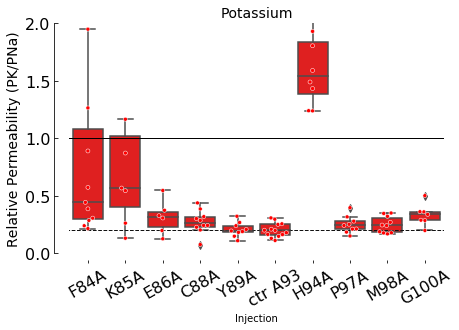

In [30]:
fig = plt.figure(figsize=(8, 4.5)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(1,1,1)


orderCons = UninjAndAlanin #["uninjected","mg419mg012","mg738mg012","mg739mg012","mg740mg012","mg741mg012","mg748mg012","mg759mg012","mg745mg012","mg752mg012","mg749mg012","mg750mg012","mg746mg012","mg747mg012", "mg760mg012","mg753mg012","mg761mg012","mg751mg012"]

#labels2 = ['Uninj']
labels2 = []
for i in range(0,len(LabelAlanin)):
    #labels2.append('')
    labels2.append(LabelAlanin[i])
sns.swarmplot(x= Potassium['Injection'], y=Potassium['Permeability'], data = Potassium,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, ax = ax1, size = 4,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(x= Potassium['Injection'], y=Potassium['Permeability'], data = Potassium, palette=sns.color_palette(colors),ax=ax1,order=orderCons)


#sns.swarmplot(y=Datamg418['PCs/Na-DT1d'], data = Datamg418,palette=sns.color_palette(colorsSINGLES), edgecolor='white', linewidth=0.5, size = 4)


YlimitPerm = [0,2]

##### AXIS 1 ####
ax1.set_ylim(YlimitPerm)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)  # no spine at the top
ax1.spines['bottom'].set_visible(False)  
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1   
ax1.plot([-1,50], [1,1] , 'k-', color='#000000', linewidth=1)
#ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1     
ax1.tick_params(axis='both', which='major', labelsize=16)  
ax1.set_title('Potassium',size=14) 
ax1.yaxis.label.set_size(20)
ax1.set_ylabel('Relative Permeability (PK/PNa)', fontsize=14)

#ax1.xaxis.set_visible(False)
ax1.set_xticklabels(labels2,rotation=30)



plt.gcf().subplots_adjust(bottom=0.17, left=0.25,right=None, top=None,hspace=0.75, wspace=0.2) 

plt.savefig(filedirExportFig+"PotassiumPermeabilityNtermAlaninWithCurrent"+'.pdf')

#F84 - K90 = A (7)
#T91 - G95 = B (5-1 = 4)
#I96 - G100 = C (5)




# Lithium

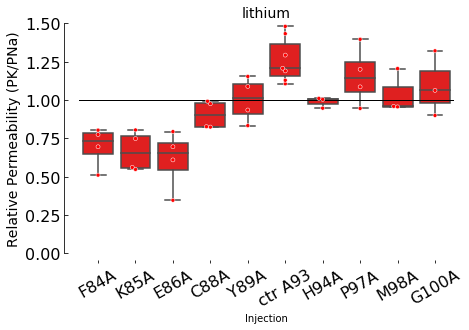

In [32]:
fig = plt.figure(figsize=(8, 4.5)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(1,1,1)


orderCons = UninjAndAlanin #["uninjected","mg419mg012","mg738mg012","mg739mg012","mg740mg012","mg741mg012","mg748mg012","mg759mg012","mg745mg012","mg752mg012","mg749mg012","mg750mg012","mg746mg012","mg747mg012", "mg760mg012","mg753mg012","mg761mg012","mg751mg012"]

#labels2 = ['Uninj']
labels2 = []
for i in range(0,len(LabelAlanin)):
    #labels2.append('')
    labels2.append(LabelAlanin[i])
sns.swarmplot(x= Lithium['Injection'], y=Lithium['Permeability'], data =Lithium,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, ax = ax1, size = 4,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(x= Lithium['Injection'], y=Lithium['Permeability'], data = Lithium, palette=sns.color_palette(colors),ax=ax1,order=orderCons)


#sns.swarmplot(y=Datamg418['PCs/Na-DT1d'], data = Datamg418,palette=sns.color_palette(colorsSINGLES), edgecolor='white', linewidth=0.5, size = 4)


YlimitPerm = [0,1.5]

##### AXIS 1 ####
ax1.set_ylim(YlimitPerm)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)  # no spine at the top
ax1.spines['bottom'].set_visible(False)  
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
#ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1   
ax1.plot([-1,50], [1,1] , 'k-', color='#000000', linewidth=1)
#ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1     
ax1.tick_params(axis='both', which='major', labelsize=16)  
ax1.set_title('lithium',size=14) 
ax1.yaxis.label.set_size(20)
ax1.set_ylabel('Relative Permeability (PK/PNa)', fontsize=14)

#ax1.xaxis.set_visible(False)
ax1.set_xticklabels(labels2,rotation=30)



plt.gcf().subplots_adjust(bottom=0.17, left=0.25,right=None, top=None,hspace=0.75, wspace=0.2) 

plt.savefig(filedirExportFig+"LithiumPermeabilityNtermAlaninWithCurrent"+'.pdf')

#F84 - K90 = A
#T91 - G95 = B
#I95 - G100 = C



# Nmg

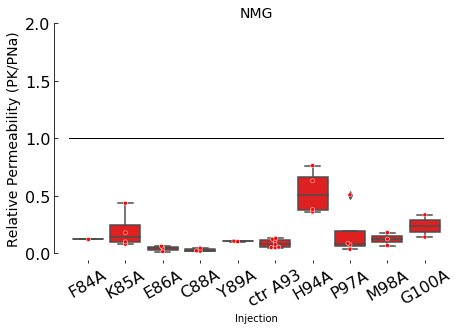

In [31]:
fig = plt.figure(figsize=(8, 4.5)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(1,1,1)


orderCons = UninjAndAlanin #["uninjected","mg419mg012","mg738mg012","mg739mg012","mg740mg012","mg741mg012","mg748mg012","mg759mg012","mg745mg012","mg752mg012","mg749mg012","mg750mg012","mg746mg012","mg747mg012", "mg760mg012","mg753mg012","mg761mg012","mg751mg012"]

#labels2 = ['Uninj']
labels2 = []
for i in range(0,len(LabelAlanin)):
    #labels2.append('')
    labels2.append(LabelAlanin[i])
sns.swarmplot(x= Nmg['Injection'], y=Nmg['Permeability'], data =Nmg,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, ax = ax1, size = 4,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(x= Nmg['Injection'], y=Nmg['Permeability'], data = Nmg, palette=sns.color_palette(colors),ax=ax1,order=orderCons)


#sns.swarmplot(y=Datamg418['PCs/Na-DT1d'], data = Datamg418,palette=sns.color_palette(colorsSINGLES), edgecolor='white', linewidth=0.5, size = 4)


YlimitPerm = [0,2]

##### AXIS 1 ####
ax1.set_ylim(YlimitPerm)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)  # no spine at the top
ax1.spines['bottom'].set_visible(False)  
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
#ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1   
ax1.plot([-1,50], [1,1] , 'k-', color='#000000', linewidth=1)
#ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1     
ax1.tick_params(axis='both', which='major', labelsize=16)  
ax1.set_title('NMG',size=14) 
ax1.yaxis.label.set_size(20)
ax1.set_ylabel('Relative Permeability (PK/PNa)', fontsize=14)

#ax1.xaxis.set_visible(False)
ax1.set_xticklabels(labels2,rotation=30)



plt.gcf().subplots_adjust(bottom=0.17, left=0.25,right=None, top=None,hspace=0.75, wspace=0.2) 

plt.savefig(filedirExportFig+"NMGPermeabilityNtermAlaninWithCurrent"+'.pdf')

#F84 - K90 = A
#T91 - G95 = B
#I95 - G100 = C



# Potassium

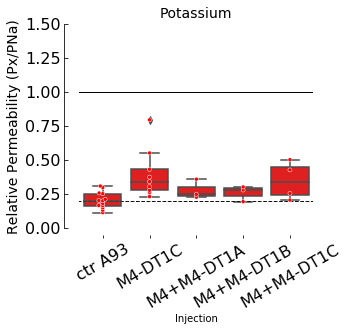

In [24]:
fig = plt.figure(figsize=(5, 4.5)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(1,1,1)


orderCons = UninjAndChimera#["uninjected","mg419mg012","mg738mg012","mg739mg012","mg740mg012","mg741mg012","mg748mg012","mg759mg012","mg745mg012","mg752mg012","mg749mg012","mg750mg012","mg746mg012","mg747mg012", "mg760mg012","mg753mg012","mg761mg012","mg751mg012"]


labels2 = []
for i in range(0,len(LabelChimera)):
    #labels2.append('')
    labels2.append(LabelChimera[i])

sns.swarmplot(x= PotassiumChimera['Injection'], y=PotassiumChimera['Permeability'], data = PotassiumChimera,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, ax = ax1, size = 4,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(x= PotassiumChimera['Injection'], y=PotassiumChimera['Permeability'], data = PotassiumChimera, palette=sns.color_palette(colors),ax=ax1,order=orderCons)


#sns.swarmplot(y=Datamg418['PCs/Na-DT1d'], data = Datamg418,palette=sns.color_palette(colorsSINGLES), edgecolor='white', linewidth=0.5, size = 4)


YlimitPerm = [0,1.5]

##### AXIS 1 ####
ax1.set_ylim(YlimitPerm)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)  # no spine at the top
ax1.spines['bottom'].set_visible(False)  
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,50], [1,1] , 'k-', color='#000000', linewidth=1) #gray line for Zero or 1       
ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1     
ax1.tick_params(axis='both', which='major', labelsize=16)  
ax1.set_title('Potassium',size=14)
ax1.yaxis.label.set_size(20)
ax1.set_ylabel('Relative Permeability (Px/PNa)', fontsize=14)

#ax1.xaxis.set_visible(False)
ax1.set_xticklabels(labels2,rotation=30)



plt.gcf().subplots_adjust(bottom=0.25, left=0.25,right=None, top=None,hspace=0.75, wspace=0.2) 

plt.savefig(filedirExportFig+"PotassiumPermeabilityNtermChimera"+'.pdf')




# Lithium chimera

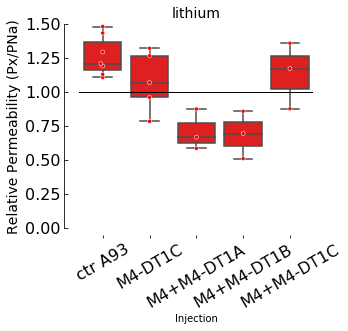

In [25]:
fig = plt.figure(figsize=(5, 4.5)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(1,1,1)


orderCons = UninjAndChimera#["uninjected","mg419mg012","mg738mg012","mg739mg012","mg740mg012","mg741mg012","mg748mg012","mg759mg012","mg745mg012","mg752mg012","mg749mg012","mg750mg012","mg746mg012","mg747mg012", "mg760mg012","mg753mg012","mg761mg012","mg751mg012"]


labels2 = []
for i in range(0,len(LabelChimera)):
    #labels2.append('')
    labels2.append(LabelChimera[i])

sns.swarmplot(x= LithiumChimera['Injection'], y=LithiumChimera['Permeability'], data = LithiumChimera,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, ax = ax1, size = 4,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(x= LithiumChimera['Injection'], y=LithiumChimera['Permeability'], data = LithiumChimera, palette=sns.color_palette(colors),ax=ax1,order=orderCons)


#sns.swarmplot(y=Datamg418['PCs/Na-DT1d'], data = Datamg418,palette=sns.color_palette(colorsSINGLES), edgecolor='white', linewidth=0.5, size = 4)


YlimitPerm = [0,1.5]

##### AXIS 1 ####
ax1.set_ylim(YlimitPerm)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)  # no spine at the top
ax1.spines['bottom'].set_visible(False)  
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,50], [1,1] , 'k-', color='#000000', linewidth=1) #gray line for Zero or 1       
#ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1     
ax1.tick_params(axis='both', which='major', labelsize=16)  
ax1.set_title('lithium',size=14) 
ax1.yaxis.label.set_size(20)
ax1.set_ylabel('Relative Permeability (Px/PNa)', fontsize=14)

#ax1.xaxis.set_visible(False)
ax1.set_xticklabels(labels2,rotation=30)



plt.gcf().subplots_adjust(bottom=0.25, left=0.25,right=None, top=None,hspace=0.75, wspace=0.2) 

plt.savefig(filedirExportFig+"LithiumPermeabilityNtermChimera"+'.pdf')




# Nmg

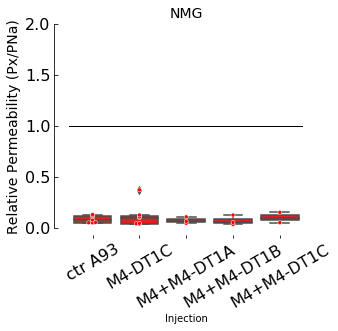

In [26]:
fig = plt.figure(figsize=(5, 4.5)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(1,1,1)


orderCons = UninjAndChimera#["uninjected","mg419mg012","mg738mg012","mg739mg012","mg740mg012","mg741mg012","mg748mg012","mg759mg012","mg745mg012","mg752mg012","mg749mg012","mg750mg012","mg746mg012","mg747mg012", "mg760mg012","mg753mg012","mg761mg012","mg751mg012"]


labels2 = []
for i in range(0,len(LabelChimera)):
    #labels2.append('')
    labels2.append(LabelChimera[i])

sns.swarmplot(x= NmgChimera['Injection'], y=NmgChimera['Permeability'], data = NmgChimera,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, ax = ax1, size = 4,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(x= NmgChimera['Injection'], y=NmgChimera['Permeability'], data = NmgChimera, palette=sns.color_palette(colors),ax=ax1,order=orderCons)


#sns.swarmplot(y=Datamg418['PCs/Na-DT1d'], data = Datamg418,palette=sns.color_palette(colorsSINGLES), edgecolor='white', linewidth=0.5, size = 4)


YlimitPerm = [0,2]

##### AXIS 1 ####
ax1.set_ylim(YlimitPerm)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)  # no spine at the top
ax1.spines['bottom'].set_visible(False)  
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,50], [1,1] , 'k-', color='#000000', linewidth=1) #gray line for Zero or 1       
#ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1     
ax1.tick_params(axis='both', which='major', labelsize=16)  
ax1.set_title('NMG',size=14) 
ax1.yaxis.label.set_size(20)
ax1.set_ylabel('Relative Permeability (Px/PNa)', fontsize=14)

#ax1.xaxis.set_visible(False)
ax1.set_xticklabels(labels2,rotation=30)



plt.gcf().subplots_adjust(bottom=0.25, left=0.25,right=None, top=None,hspace=0.75, wspace=0.2) 

plt.savefig(filedirExportFig+"NMGPermeabilityNtermChimera"+'.pdf')


